# Deep Learning based Object Detection
This model was included in OpenCV in version 3.3. It is based on Single-Shot-Multibox detector and uses ResNet-10 Architecture as backbone. The model was trained using images available from the web, but the source is not disclosed. OpenCV provides 2 models for this face detector.

- Floating point 16 version of the original caffe implementation ( 5.4 MB )
- 8 bit quantized version using Tensorflow ( 2.7 MB )

We have included both the models along with the code.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
from dataPath import MODEL_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
DNN = "TF"
if DNN == "CAFFE":
    modelFile = MODEL_PATH + "res10_300x300_ssd_iter_140000_fp16.caffemodel"
    configFile = MODEL_PATH + "deploy.prototxt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
else:
    modelFile = MODEL_PATH + "opencv_face_detector_uint8.pb"
    configFile = MODEL_PATH + "opencv_face_detector.pbtxt"
    net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

## Code Explanation 
First, the image is converted to a blob of size (300,300). 

Then it is passed through the network using the forward() function. The output detections is a 4-D matrix, where 

* The 3rd dimension iterates over the detected faces. (i is the iterator over the number of faces)
* The fourth dimension contains information about the bounding box and score for each face. For example, detections[0,0,0,2] gives the confidence score for the first face, and detections[0,0,0,3:6] give the bounding box.


The output coordinates of the bounding box are normalized between [0,1]. Thus the coordinates should be multiplied by the height and width of the original image to get the correct bounding box on the image.

In [4]:
def detectFaceOpenCVDnn(net, frame):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], False, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes


In [5]:
conf_threshold = 0.6

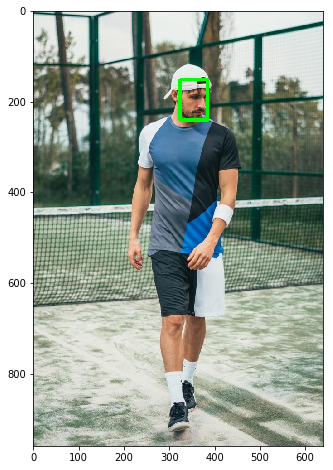

In [6]:
im = cv2.imread(DATA_PATH + 'images/man.jpg')
output,bboxes = detectFaceOpenCVDnn(net, im)
plt.imshow(output[:,:,::-1])


## Conclusion 
The method has the following merits :

1. Very accurate
1. Runs at real-time on CPU
1. Works for different face orientations - up, down, left, right, side-face etc.
1. Works even under substantial occlusion
1. Detects faces across various scales ( detects big as well as tiny faces )


The DNN based detector overcomes all the drawbacks of Haar cascade based detector, without compromising on any benefit provided by Haar Cascades.

It would be safe to say that it is time to bid farewell to Haar-based face detector and DNN based Face Detector should be the preferred choice in OpenCV.